# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img
import keras

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [2]:
def create_padding(input_image, d):

    #TODO
    n, m = input_image.shape
    output_image = np.zeros((n + 2*d, m + 2*d))
    output_image[d:n+d, d:m+d] = input_image

    return output_image
    

**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [3]:
def convolution(input_image, kernel):

    #TODO
    n, m = input_image.shape
    k, _ = kernel.shape  # Assuming kernel is square, so k x k
    
    output_height = n - k + 1
    output_width = m - k + 1
    output_image = np.zeros((output_height, output_width))
    
    # Perform the convolution operation
    for i in range(output_height):
        for j in range(output_width):
            region = input_image[i:i+k, j:j+k]
            output_image[i, j] = np.sum(region * kernel)

    return output_image

**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [4]:
def pooling(input_image, p, pooling_type = "max_pooling"):

    n, m = input_image.shape
    
    output_height = n - p + 1
    output_width = m - p + 1
    output_image = np.zeros((output_height, output_width))
    
    if pooling_type == "max_pooling":

        #TODO
        for i in range(output_height):
            for j in range(output_width):
                region = input_image[i:i+p, j:j+p]
                output_image[i, j] = np.max(region)
        pass

    elif pooling_type == "avg_pooling":

        #TODO
        for i in range(output_height):
            for j in range(output_width):
                region = input_image[i:i+p, j:j+p]
                output_image[i, j] = np.mean(region)
        pass

    else:
        print("Error: Invalid pooling type")
        return

    return(output_image)
    

The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

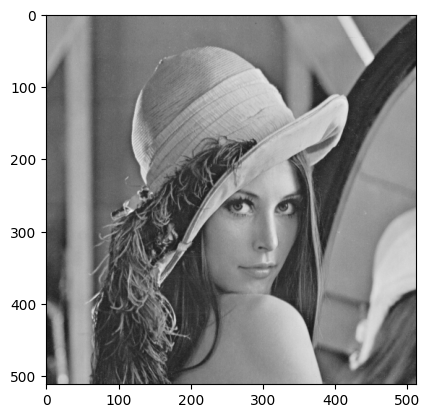

In [5]:
lena = load_img('lena.gif')
plt.imshow(lena)
plt.show()

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

<font color='blue'>Explain what the above kernels (including your choice) will do to the image.</font>

**Answer** (to write answers edit this cell)

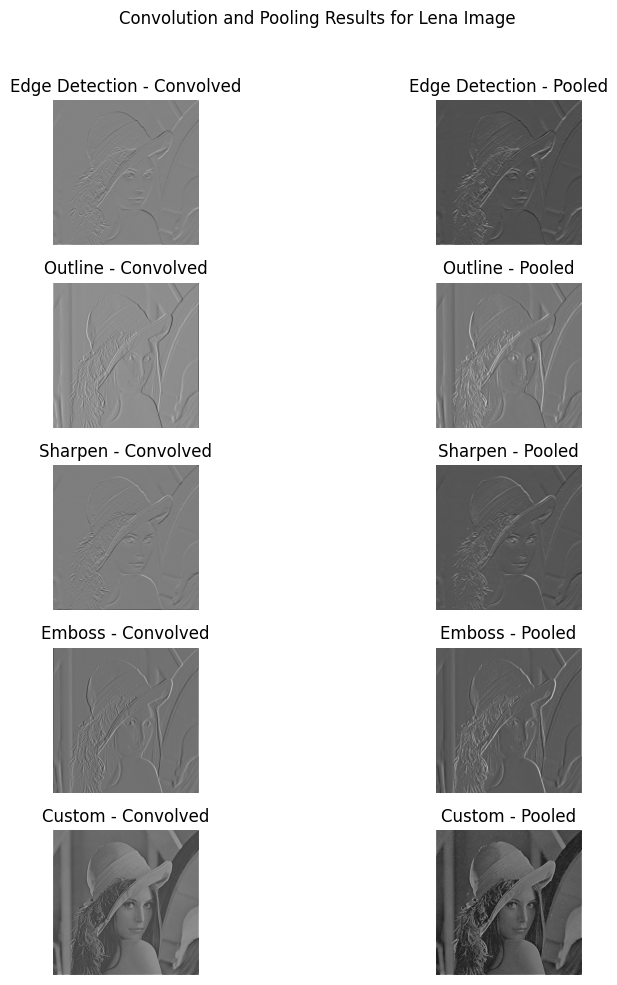

In [7]:
# #TODO
# #Write code to use your convolution and pooling methods.


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load Lena image (GIF format) and convert to grayscale and NumPy array
lena = Image.open('lena.gif').convert('L')  # Convert to grayscale
lena = np.array(lena)  # Convert to NumPy array

# Define kernels
kernels = {
    "Edge Detection": np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
    "Outline": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Sharpen": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Emboss": np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
    "Custom": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Example custom kernel for sharpening
}

# Function to apply convolution and pooling with padding
def apply_convolution_and_pooling(image, kernel, pool_size=2, pool_type="max_pooling"):
    # Convolve with padding to maintain size
    padded_image = create_padding(image, 1)
    convolved_image = convolution(padded_image, kernel)
    
    # Pool without padding
    pooled_image = pooling(convolved_image, pool_size, pool_type)
    
    return convolved_image, pooled_image

# Display results
fig, axes = plt.subplots(len(kernels), 2, figsize=(10, 10))
fig.suptitle("Convolution and Pooling Results for Lena Image")

for i, (name, kernel) in enumerate(kernels.items()):
    # Apply convolution and pooling
    convolved_image, pooled_image = apply_convolution_and_pooling(lena, kernel)
    
    # Display images
    axes[i, 0].imshow(convolved_image, cmap="gray")
    axes[i, 0].set_title(f"{name} - Convolved")
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(pooled_image, cmap="gray")
    axes[i, 1].set_title(f"{name} - Pooled")
    axes[i, 1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

<font color='blue'>Comment on the results of the above experiment. Mention whether you think the experiment was successful, and what your learnt from it.</font>

The experiment was successful in demonstrating the effects of different convolution kernels on an image. The results show that each kernel produces a distinct output, highlighting their specific roles in edge detection, outlining, sharpening, embossing, and custom filtering. 

From this experiment, we learn that convolution kernels act as specialized filters, each designed to achieve a particular visual effect on an image. Choosing the right kernel depends on the desired outcome. For instance, if we want to enhance edges, we would use an edge detection kernel. Similarly, for sharpening details, the sharpening kernel would be the appropriate choice.

This experiment highlights the power and flexibility of convolutional operations in image processing, offering a wide range of possibilities for manipulation and enhancement. It also emphasizes the importance of understanding how different kernels operate to achieve desired results.

**Answer** (to write answers edit this cell)

## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to build the structure of your project appropriately using keras. I have provided only the code to download the cifar10 dataset. After using CNN on the dataset, provide the following. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Note: You are required test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [24]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [25]:
from keras.utils import to_categorical
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [26]:
# Define the CNN architecture
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

# Implement 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
val_scores = []

for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_model()
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(x_val_fold, y_val_fold), verbose=1)

    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    val_scores.append(val_acc)

# Calculate average cross-validation accuracy
cv_accuracy = np.mean(val_scores)
print(f'5-Fold Cross-Validation Accuracy: {cv_accuracy:.4f}')



Epoch 1/10
625/625 [==============================] - 29s 44ms/step - loss: 1.7262 - accuracy: 0.3665 - val_loss: 1.3564 - val_accuracy: 0.5166
Epoch 2/10
625/625 [==============================] - 25s 40ms/step - loss: 1.3618 - accuracy: 0.5122 - val_loss: 1.2066 - val_accuracy: 0.5775
Epoch 3/10
625/625 [==============================] - 25s 40ms/step - loss: 1.2234 - accuracy: 0.5669 - val_loss: 1.1184 - val_accuracy: 0.6039
Epoch 4/10
625/625 [==============================] - 24s 38ms/step - loss: 1.1190 - accuracy: 0.6076 - val_loss: 1.0323 - val_accuracy: 0.6345
Epoch 5/10
625/625 [==============================] - 24s 39ms/step - loss: 1.0202 - accuracy: 0.6453 - val_loss: 0.9580 - val_accuracy: 0.6580
Epoch 6/10
625/625 [==============================] - 25s 40ms/step - loss: 0.9621 - accuracy: 0.6644 - val_loss: 0.9554 - val_accuracy: 0.6589
Epoch 7/10
625/625 [==============================] - 25s 40ms/step - loss: 0.9030 - accuracy: 0.6825 - val_loss: 0.8982 - val_accuracy:

In [28]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 4s 11ms/step - loss: 0.8374 - accuracy: 0.7201
Test Accuracy: 0.7201


313/313 [==============================] - 4s 12ms/step


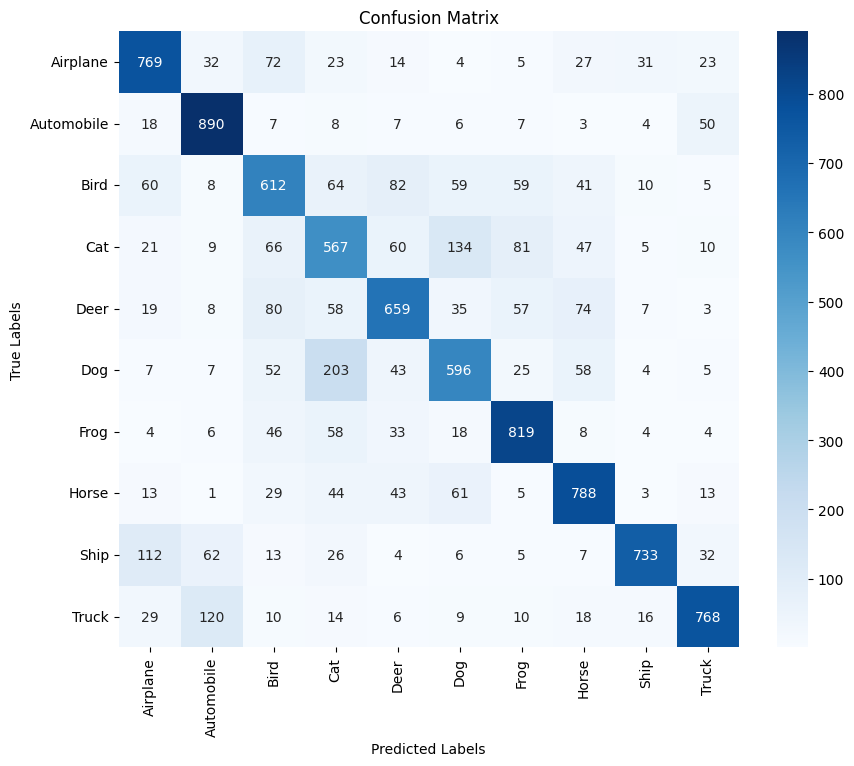

Classification Report:
               precision    recall  f1-score   support

    Airplane       0.73      0.77      0.75      1000
  Automobile       0.78      0.89      0.83      1000
        Bird       0.62      0.61      0.62      1000
         Cat       0.53      0.57      0.55      1000
        Deer       0.69      0.66      0.68      1000
         Dog       0.64      0.60      0.62      1000
        Frog       0.76      0.82      0.79      1000
       Horse       0.74      0.79      0.76      1000
        Ship       0.90      0.73      0.81      1000
       Truck       0.84      0.77      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [29]:
# Predictions on test data
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
], yticklabels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification report for Precision and Recall
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
]))

In [22]:
#TODO

#Include necessary code in this cell, or cells added below as required.

<font color='blue'>Comment on the results of the above experiment, including which classes were difficult to classify and your opinion. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** (to write answers edit this cell)

The experiment was successful in demonstrating the effectiveness of a basic CNN architecture for image classification. However, there's room for improvement, and certain classes proved more challenging to classify than others.

Overall Accuracy: The model achieved a test accuracy of 72.01%, indicating a decent performance. However, this suggests that the model could misclassify a significant portion of the images.

Difficult Classes: The confusion matrix highlights that "Dog" and "Cat" were particularly challenging for the model to distinguish. This is likely due to the visual similarities between these classes, making them difficult even for humans to differentiate sometimes.

Success: The model's performance was overall successful, demonstrating the potential of CNNs for image classification. However, it suggests that further training with more data or a more complex architecture could lead to improved accuracy.

Learnings:

1. Data Matters: The performance of a CNN is heavily reliant on the quality and quantity of training data. Insufficient or poorly labelled data can hinder the model's ability to learn accurate representations of different classes.

2. Architecture Design: The architecture of a CNN plays a critical role. More complex architectures with deeper layers and more convolutional filters can learn more intricate features, leading to higher accuracy.

3. Hyperparameter Tuning: Experimenting with different hyperparameters, such as the learning rate, number of epochs, and batch size, can significantly impact the model's training and performance.